# Publications Overview

A notebook that provides an overview of the copied poems in the dataset.

## Notebook setup

Ensure that necessary libraries are install and imported into the workplace.

In [1]:
# setup relative path to import local module (needed when used in Conda) https://stackoverflow.com/questions/34478398
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
import visualising_poetry.data as vpd
import visualising_poetry.widgets as vpw

# import libraries
import numpy as np
import matplotlib.pyplot as plot
import seaborn as sn
import ipywidgets as widgets
from IPython.display import display, HTML

# get data and process (if necessary)
vpd.setup_if_needed()

# get data as a single data frame
df = vpd.complete_dataset()

# create a data frame of poems identified as copies
copies_df = vpd.copied_poems(df)

## Copies

Scatter graph to show the number of poems identified as duplicates.

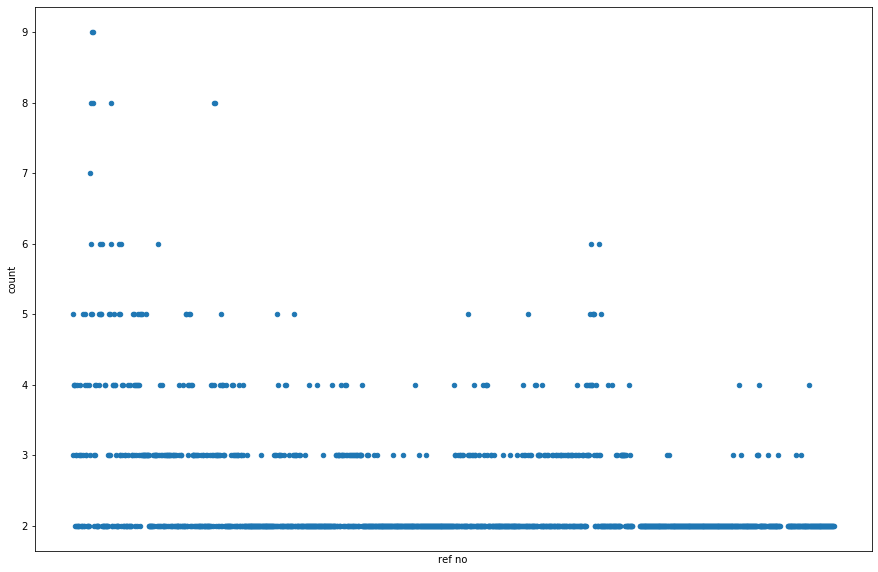

In [2]:
# create a subset sorted by ref no
copies_df_sorted = copies_df[[vpd.REF_NO, vpd.PUB_TITLE, vpd.YEAR, vpd.MONTH, vpd.DAY, vpd.F_LINE]].sort_values(
    by=[vpd.REF_NO, vpd.YEAR, vpd.MONTH, vpd.DAY])

# count the copies
copies_count = copies_df_sorted.groupby(vpd.REF_NO)[vpd.F_LINE].count()
copies_count_df = copies_count.to_frame().reset_index().rename(columns= {vpd.F_LINE: 'count'})

copies_count_df.plot(kind='scatter', x='ref no', y='count', figsize=(15, 10))
plot.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plot.show()

## Matrix / heat map (all years)

This matrix / heat map shows the number poems that were shared between publications. The score does not include the 
poem being republished by the same publication.

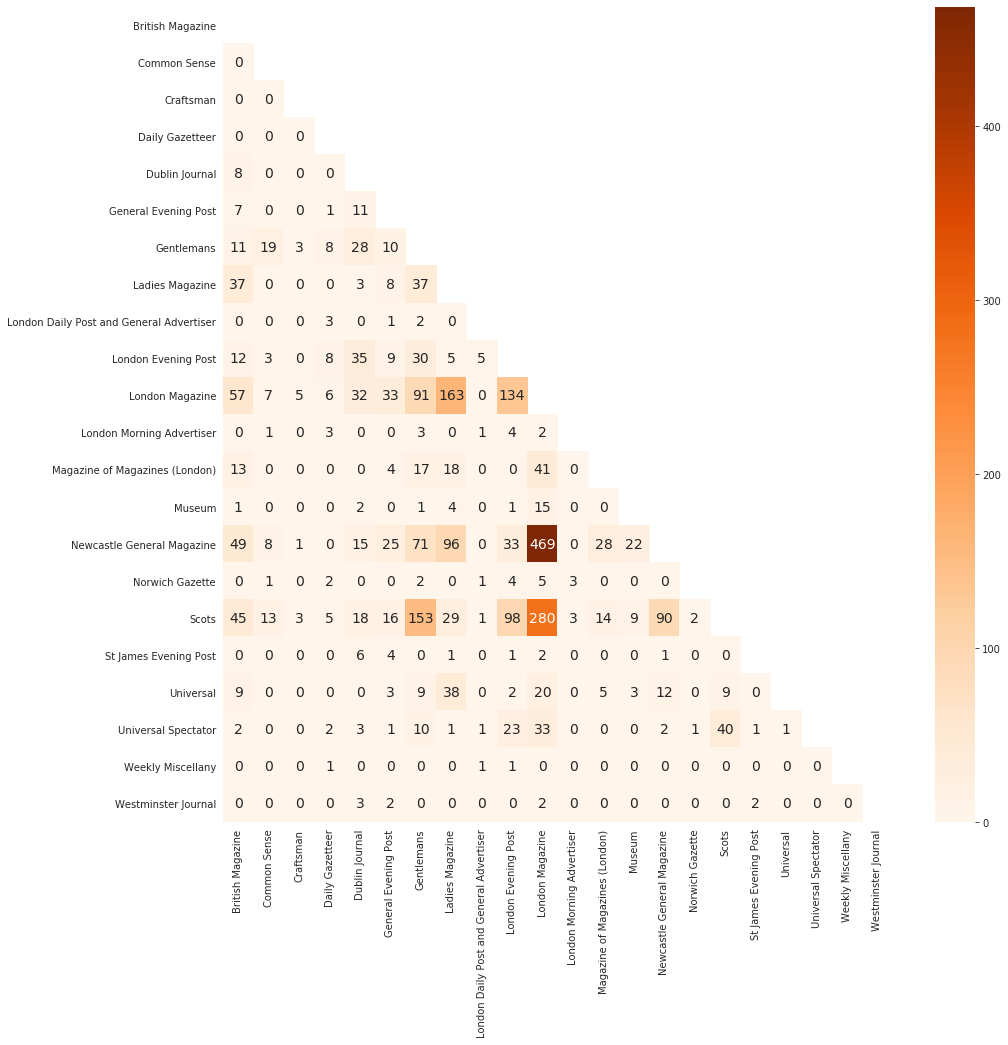

In [3]:
# create a matrix of publications
matrix = vpd.create_publications_matrix(copies_df)

# mask one side of the matrix to hide duplication
mask = np.zeros_like(matrix)
mask[np.triu_indices_from(mask)] = True

# display the heat map
plot.figure(figsize=(15, 15))
with sn.axes_style("white"):
    sn.heatmap(matrix, mask=mask, cmap='Oranges', annot=True, fmt='g', annot_kws={'size':14})
plot.show()

## Matrix / heat map (by year)

Select a year to generate a matrix / heat map showing the number poems that were shared between publications in
that year.

In [4]:
# create the drop-down widget and button
pub_widget = vpw.publication_year_widget(df)
btn = widgets.Button(description='Generate report')

# output for our widget
out = widgets.Output(layout={'border': '1px solid black'})

# method called to generate output
def on_button_pressed(button):
    out.clear_output()
    with out:
        year = pub_widget.value
        copies_year_df = copies_df[copies_df['year'] == year]
        if copies_year_df.size > 0:
            copies_matrix = vpd.create_publications_matrix(copies_year_df)
            # mask one side of the matrix to hide duplication
            copies_mask = np.zeros_like(copies_matrix)
            copies_mask[np.triu_indices_from(copies_mask)] = True
            plot.figure(figsize=(15, 15))
            plot.title(year)
            sn.heatmap(copies_matrix, mask=copies_mask, cmap='Oranges', annot=True, fmt='g', annot_kws={'size':14})
            plot.show()
        else:
            display(HTML('<p>No data for {}.'.format(year)))

# display UI
btn.on_click(on_button_pressed)
display(pub_widget)
display(btn)
out

Select(description='Choose', options=(1740, 1741, 1742, 1743, 1744, 1745, 1746, 1747, 1748, 1749, 1750, 1751, …

Button(description='Generate report', style=ButtonStyle())

Output(layout=Layout(border='1px solid black'))